# 一、内积

设列向量a = 
$\begin{bmatrix}
{a_{1}}\\
{a_{2}}\\
{\vdots}\\
{a_{n}}\\
\end{bmatrix}$，列向量b = $\begin{bmatrix}
{b_{1}}\\
{b_{2}}\\
{\vdots}\\
{b_{n}}\\
\end{bmatrix}$，则上述两个列向量的内积（也叫点积）为：

$$
a \cdot b = a^T \times b = \begin{bmatrix}
{a_{1}} & {a_{2}} & {\cdots} & {a_{n}}
\end{bmatrix} \times \begin{bmatrix}
{b_{1}}\\
{b_{2}}\\
{\vdots}\\
{b_{n}}\\
\end{bmatrix} = a_1\cdot b_1 + a_2\cdot b_2 + \cdots + a_n\cdot b_n  
$$

如果一个列向量乘以一个行向量，得到的是一个矩阵:

$$
a \times b = 
\begin{bmatrix}
{a_{1}}\\
{a_{2}}\\
{\vdots}\\
{a_{n}}\\
\end{bmatrix} \times \begin{bmatrix}
{b_{1}} & {b_{2}} & {\cdots} & {b_{n}}
\end{bmatrix} 
= \begin{bmatrix}
{a_{1} \cdot b_{1}}&{a_{1} \cdot b_{2}}&{\cdots}&{a_{1} \cdot b_{n}}\\
{a_{2} \cdot b_{1}}&{a_{2} \cdot b_{2}}&{\cdots}&{a_{2} \cdot b_{n}}\\
{\vdots}&{\vdots}&{\ddots}&{\vdots}\\
{a_{n} \cdot b_{1}}&{a_{n} \cdot b_{2}}&{\cdots}&{a_{n} \cdot b_{n}}\\
\end{bmatrix} 
$$

# 二、感知机

## 2.1 概念

- 感知机是根据输入实例的特征向量$x$对其进行二类分类的线性分类模型：

$$
f(x)=\operatorname{sign}(w \cdot x+b)
$$

$$感知机模型对应于输入空间（特征空间）中的分离超平面w \cdot x+b=0。$$



- 感知机学习的策略是极小化损失函数：

$$
\min _{w, b} L(w, b)=-\sum_{x_{i} \in M} y_{i}\left(w \cdot x_{i}+b\right)
$$

$$损失函数对应于误分类点到分离超平面的总距离。$$

- 感知机学习算法是基于随机梯度下降法的对损失函数的最优化算法，有原始形式和对偶形式。算法简单且易于实现。原始形式中，首先任意选取一个超平面，然后用梯度下降法不断极小化目标函数。在这个过程中一次随机选取一个误分类点使其梯度下降。
 
- 当训练数据集线性可分时，感知机学习算法是收敛的。感知机算法在训练数据集上的误分类次数$k$满足不等式：

$$
k \leqslant\left(\frac{R}{\gamma}\right)^{2}
$$

**当训练数据集线性可分时，感知机学习算法存在无穷多个解，其解由于不同的初值或不同的迭代顺序而可能有所不同。**

## 2.2 算法流程

- 输入：

    训练数据集$T = {( x_1,y_1 ),(x_2,y_2 ), \cdots , ( x_N,y_N )}$ ，其中$x_i \in χ = R^n, y_i \in Y = {−1, +1}，i=1,2,\cdots,N$;

    学习率$\eta(0 \gt \eta \lt 1)$;
    

- 输出：w , b 


- 感知机模型：$f(x) = sign(w \cdot x + b)$


- 解的过程：

    (1) 选取初值$w_0 , b_0$ 
    
    (2) 在训练集中选取数据$(x_i,y_i)$
    
    (3) 如果$y_i(w \cdot x_i + b) \le 0$
    
$$
w\gets w+\eta y_ix_i 
$$
$$
b \gets b+\eta y_i 
$$
 
    (4) 转至（2），直至训练集中没有误分类点
    
当一个点实例点被误分类，即位于分离超平面的错误一侧时，则调整 $w , b$的值，使分离超平面向该分类点的一侧移动，以减少该误分类点与超平面间的距离，直至超平面超过误分类点使其被正确分类。

## 2.3 算法示例

在训练集中，其正实例点是$x_1=(3,3)^T，x_2=(4,3)^T$，其负实例点是$x_3=(1,1)^T$，试用感知机学习算法的原始形式求感知机模型$f(x)=sign(w \cdot x+b)$。这里，$w=(w^{(1)},w^{(2)})^T，x=(x^{(1)},x^{(2)})^T$。

思路：

构建最优化问题：
$$
\min_{w,b}L(w,b)=-\sum_{x_i \in M}y_i(w·x_i+b)
$$

按照上述算法流程求解w , b , $\eta$ =1。

解：

（1）取初值$w_0=0, b_0=0$

（2）取点$x_1=(3,3)^T, y_1(w_0 \cdot x_1+b_0)=0,满足y_i(w·x_i+b)\le 0$,未能被正确分类，故更新$w,b$

$$
w_1 = w_0 + \eta y_1x_1 = (3,3)^T，b_1=b_0+1
$$

得到线性模型：

$$
w_1 x + b_1 = \begin{bmatrix}
{3}\\
{3}\\
\end{bmatrix} \cdot \begin{bmatrix}
{x^{(1)}}\\
{x^{(2)}}\\
\end{bmatrix} + 1 = 3x^{(1)} + 3x^{(2)}+1
$$

（3）取点$x_1,x_2,显然y_i(w·x_i+b)\gt 0$,即被正确分类，不修改$w,b$；取点$x_3=(1,1)^T, y_3(w_1 \cdot x_3+b_1)\lt 0,满足y_i(w·x_i+b)\lt 0$,未能被正确分类，故更新$w,b$

$$w_2 = w_1 + \eta y_3x_3 = (3,3)^T+(-1)*(1,1)^T=(2,2)^T，b_2=b_1-1=0$$

得到线性模型：

$$
w_2 x + b_2 = \begin{bmatrix}
{2}\\
{2}\\
\end{bmatrix} \cdot \begin{bmatrix}
{x^{(1)}}\\
{x^{(2)}}\\
\end{bmatrix} + 0 = 2x^{(1)} + 2x^{(2)}
$$

（4）每次更新 w , b w,b w,b 就要从新遍历整个训练集，如此继续下去，直到

$$w_7 = (1,1)^T，b_7=-3$$

$$w_7 \cdot x+b_7 =  x^{(1)} + x^{(2)}-3$$

对所有数据点$y_i(w_7 \cdot x_i+b_7) \gt 0$，没有误分类点，损失函数达到极小。

分离超平面为：$$x^{(1)} + x^{(2)}-3=0$$

感知机模型为：$$f(x)=sign(x^{(1)} + x^{(2)}-3)$$

## 2.4 代码实现

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
## load data
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)   # feature_names:特征值
df['label']=iris.target    # target：鸢尾花分类：0-setosa；1-versicolor；2-virginica

In [7]:
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]

In [8]:
df.label.value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [17]:
df.head()
df

,sepal length,sepal width,label
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
5,5.4,3.9,0
6,4.6,3.4,0
7,5.0,3.4,0
8,4.4,2.9,0
9,4.9,3.1,0


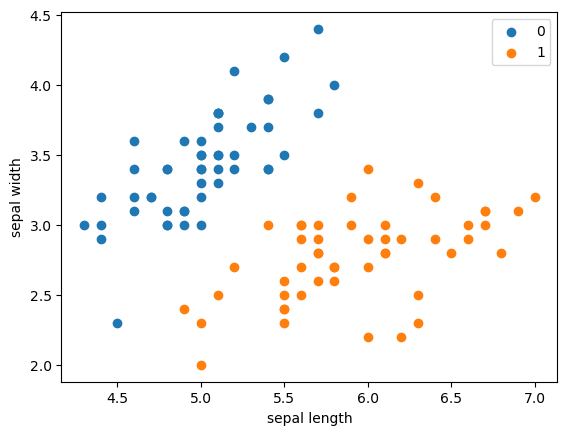

In [16]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'],label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'],label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [22]:
data = np.array(df.iloc[:100, [0,1,-1]])
X,y = data[:,:-1], data[:,-1]
y = np.array([1 if i==1 else -1 for i in y])